In [8]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Data Loading and Preparation**

In [127]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [128]:
# Converting to DataFrame for easier data manipulation and visualization
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                   columns=iris['feature_names']+['target'])

In [129]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


**Dataset Information**

In [130]:
df.shape

(150, 5)

In [131]:

#basic statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [133]:

#duplicate values
df.duplicated().sum()

1

In [134]:

#missing/null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [135]:

#check no. of unique values

for i in df.columns.tolist():
    print('No. of unique values in', i, 'is', df[i].nunique())

No. of unique values in sepal length (cm) is 35
No. of unique values in sepal width (cm) is 23
No. of unique values in petal length (cm) is 43
No. of unique values in petal width (cm) is 22
No. of unique values in target is 3


In [139]:

# Mapping target variable to their respective iris species for visualisation

value_to_category = {0: "iris_setosa", 1: "iris_versicolor", 2: "iris_virginica"}

# Create a new categorical variable based on the mapping dictionary
df['species'] = df['target'].map(value_to_category)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,iris_setosa
1,4.9,3.0,1.4,0.2,0.0,iris_setosa
2,4.7,3.2,1.3,0.2,0.0,iris_setosa
3,4.6,3.1,1.5,0.2,0.0,iris_setosa
4,5.0,3.6,1.4,0.2,0.0,iris_setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,iris_virginica
146,6.3,2.5,5.0,1.9,2.0,iris_virginica
147,6.5,3.0,5.2,2.0,2.0,iris_virginica
148,6.2,3.4,5.4,2.3,2.0,iris_virginica


**Exploratory Data Analysis**

**Univariate Analysis**

**Boxplot**

<Axes: xlabel='petal length (cm)', ylabel='species'>

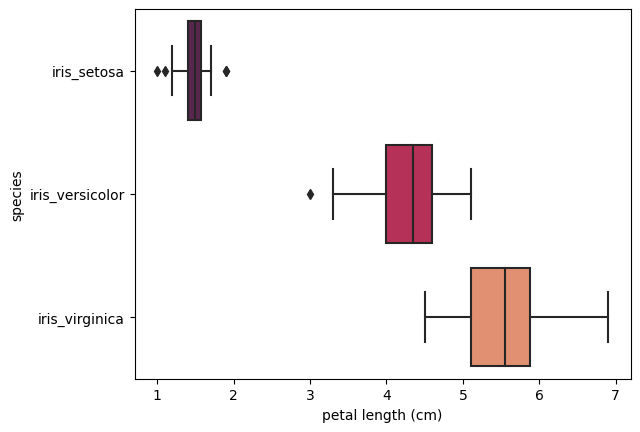

In [142]:
sns.boxplot(data=df, x = "petal length (cm)", y = "species", palette = "rocket")

<Axes: xlabel='petal width (cm)', ylabel='species'>

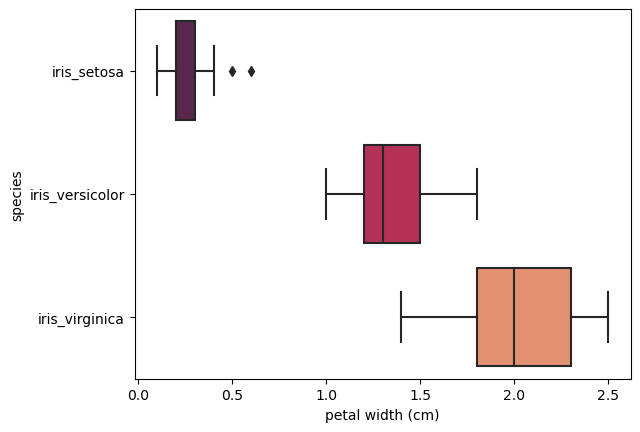

In [144]:
sns.boxplot(data=df, x = "petal width (cm)", y = "species", palette = "rocket")

<Axes: xlabel='sepal length (cm)', ylabel='species'>

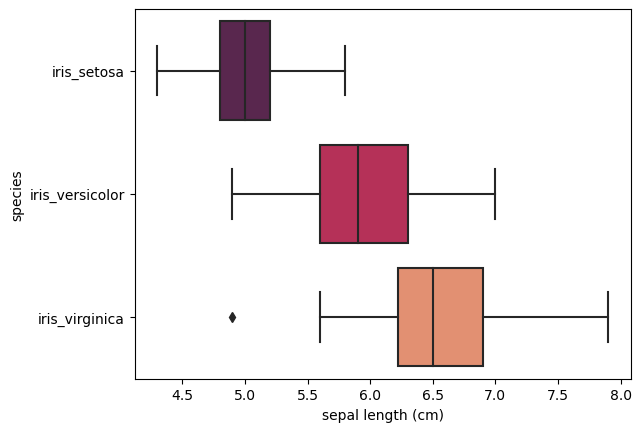

In [145]:
sns.boxplot(data=df, x = "sepal length (cm)", y = "species", palette = "rocket")

<Axes: xlabel='sepal width (cm)', ylabel='species'>

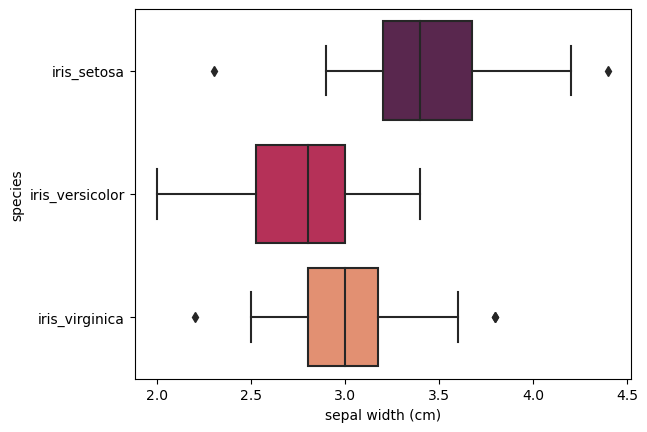

In [146]:
sns.boxplot(data=df, x = "sepal width (cm)", y = "species", palette = "rocket")

- Outliers are few and can be neglected.

**Histplot**

<Axes: xlabel='petal length (cm)', ylabel='Count'>

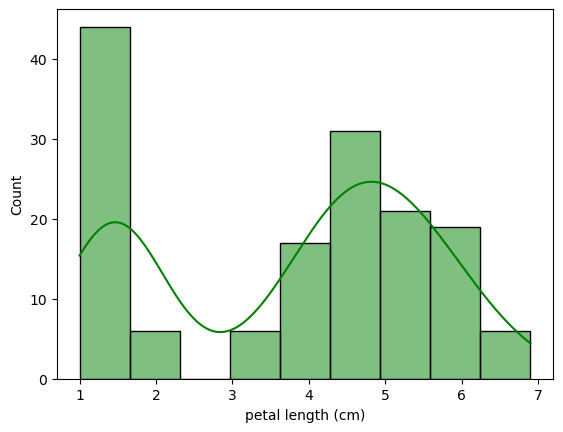

In [147]:
sns.histplot(data=df, x = "petal length (cm)", kde = True, color = "Green")

<Axes: xlabel='petal width (cm)', ylabel='Count'>

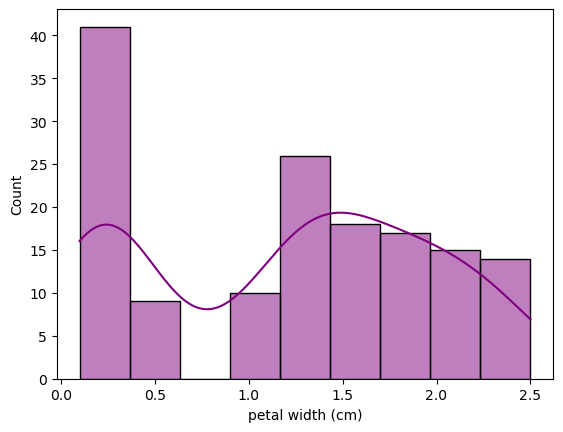

In [148]:
sns.histplot(data=df, x = "petal width (cm)", kde = True, color = "Purple")

<Axes: xlabel='sepal length (cm)', ylabel='Count'>

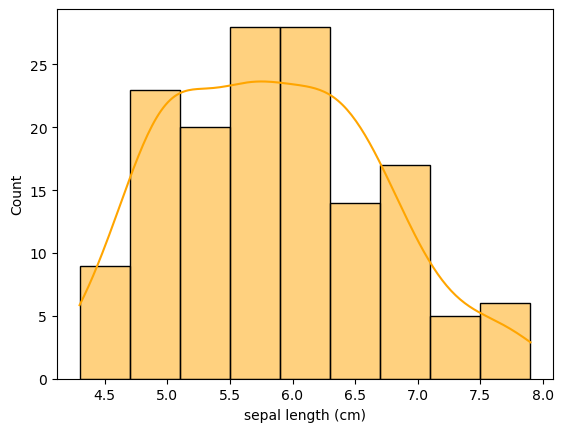

In [149]:
sns.histplot(data=df, x = "sepal length (cm)", kde = True, color = "Orange")

<Axes: xlabel='sepal width (cm)', ylabel='Count'>

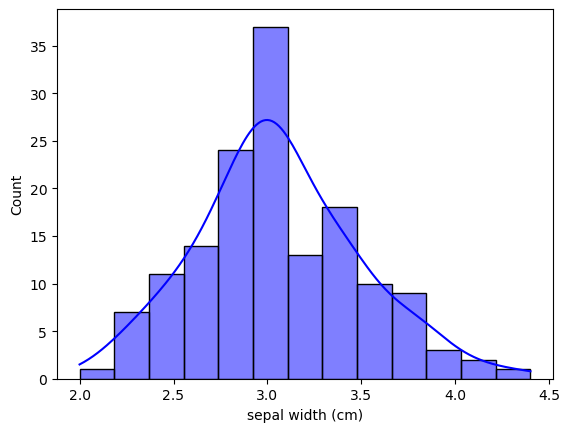

In [150]:
sns.histplot(data=df, x = "sepal width (cm)", kde = True, color = "blue")

**Bivariate Analysis**

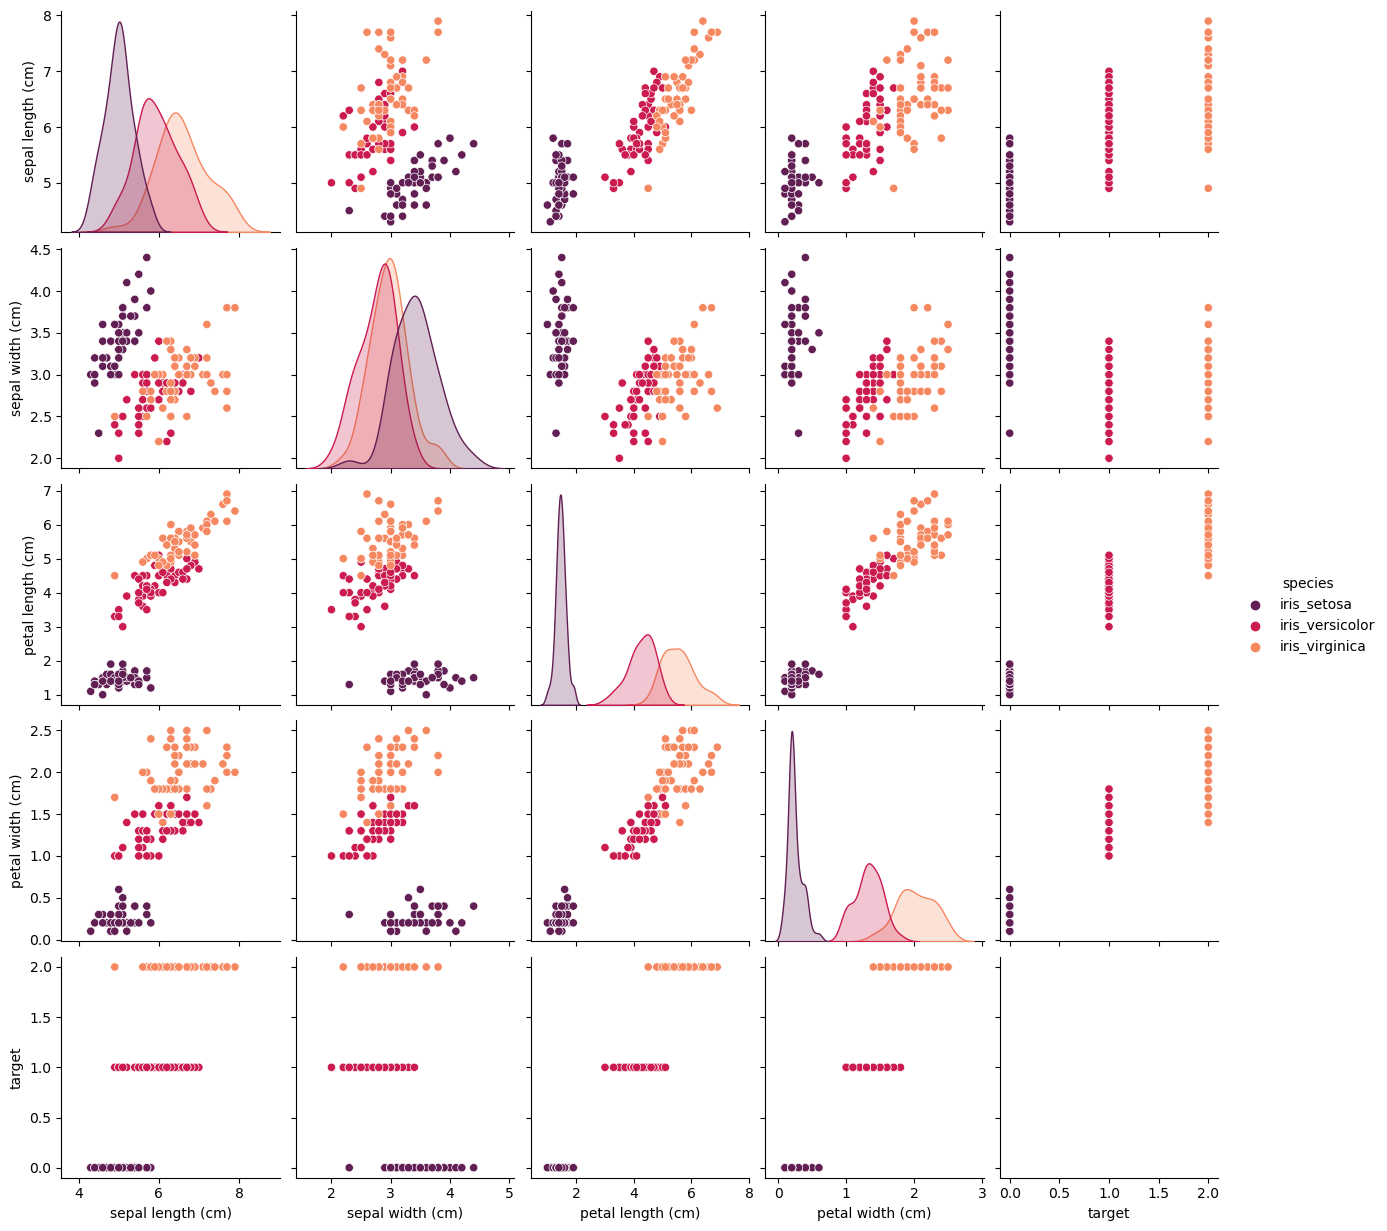

In [152]:
#pairplot
sns.pairplot(data=df, hue = "species", palette = "rocket")
plt.show()

- Most of the data points are clearly seperable even in bivariate analysis suggesting a model with good accuracy to be possible.

In [269]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [271]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


**Data Standardization**

In [272]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**MODEL 1 - LOGISTIC REGRESSION**

In [275]:
lr_model = LogisticRegression(random_state=42)
history = lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

**MODEL 2 - KNN**

In [276]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

**MODEL 3 - NEURAL NETWORKS**

In [286]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical

In [287]:
# Deep Learning model setup

dl_model = Sequential([
    Dense(6, input_shape=(4,), activation = "relu"),
    Dense(3, activation = "softmax")
])
dl_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])

In [288]:
# Train the Deep Learning model
history = dl_model.fit(X_train, y_train, epochs=100, batch_size=5, validation_split=0.2)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3624 - loss: 1.0365 - val_accuracy: 0.2083 - val_loss: 1.2034
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3707 - loss: 1.0121 - val_accuracy: 0.2083 - val_loss: 1.1239
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3212 - loss: 1.0139 - val_accuracy: 0.3333 - val_loss: 1.0682
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3995 - loss: 0.9193 - val_accuracy: 0.3750 - val_loss: 1.0184
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4864 - loss: 0.8557 - val_accuracy: 0.3750 - val_loss: 0.9734
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5345 - loss: 0.8432 - val_accuracy: 0.4167 - val_loss: 0.9342
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6121 - loss: 0.7450 - val_accuracy: 0.4167 - val_loss: 0.8971
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6331 - loss: 0.7539 - val_accuracy: 0.6667 - 

In [289]:
# Deep Learning predictions
dl_predictions = np.argmax(dl_model.predict(X_test), axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


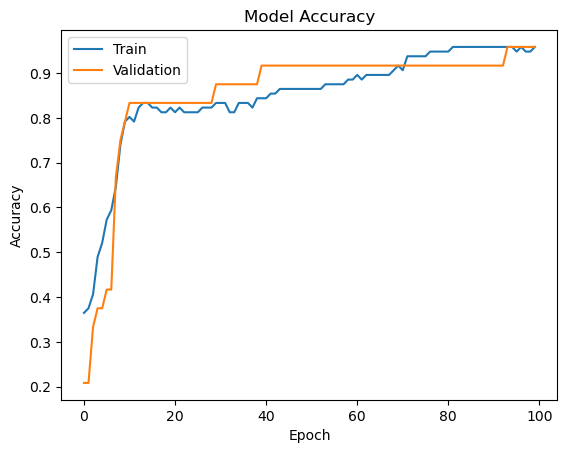

In [290]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc = "upper left")
plt.show()

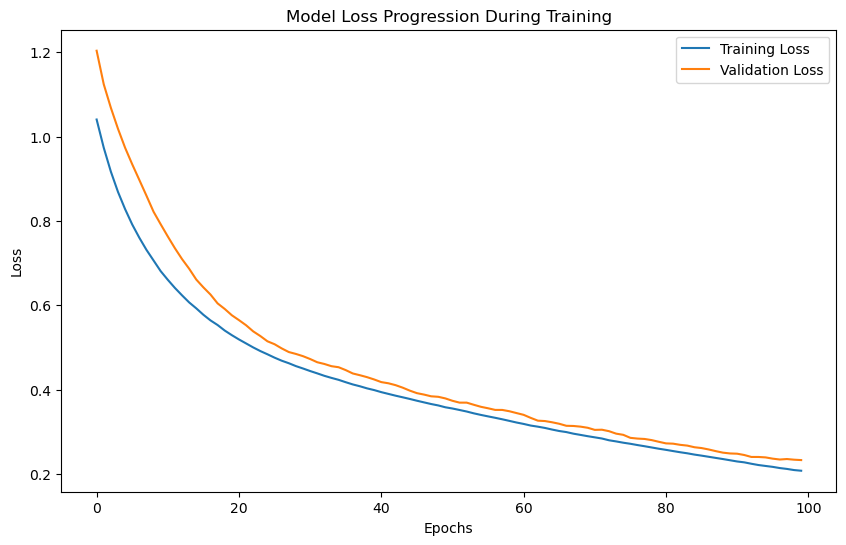

In [291]:
# plotting the loss for the Deep Learning Model

plt.figure(figsize = (10, 6))
plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label= "Validation Loss")
plt.title("Model Loss Progression During Training")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [293]:
# Predictions

loss, accuracy = dl_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.1650
Test Accuracy: 1.00


**Classification Report**

In [294]:
print("Logistic Regression Classification Report:\n",
      classification_report(y_test, lr_predictions))
print("K-NN Classification Report:\n",
      classification_report(y_test, knn_predictions))
print("Deep Learning Classification Report:\n",
      classification_report(y_test, dl_predictions))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

K-NN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Deep Learning Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1      